In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Returns_prediction_for_E-commers_1.csv")


# Pre-Processing

In [3]:
df.head()

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,...,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Delivery_Days,Past_Orders,Past_Returns,Past_Return_Rate,Region
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,NaN,Beauty,367.51,1,NaN,Not Returned,...,Male,City22,Credit Card,Next-Day,0.00,1,3,0,0.000,South
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,1.697242e+18,Clothing,262.75,1,Changed Mind,Returned,...,Female,City16,Credit Card,Express,21.57,4,8,1,0.125,South
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Home,375.88,5,NaN,Not Returned,...,Female,City48,Cash on Delivery,Next-Day,0.00,1,2,0,0.000,East
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,1.725754e+18,Toys,352.96,1,Late Delivery,Returned,...,Male,City30,Wallet,Next-Day,51.76,2,2,1,0.500,Central
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Sports,100.68,7,NaN,Not Returned,...,Female,City23,PayPal,Standard,23.47,6,4,0,0.000,West


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       3350 non-null   float64
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     3235 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    3350 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [5]:
df.shape

(10000, 22)

In [6]:
df.describe()

,Return_Date,Product_Price,Order_Quantity,Days_to_Return,User_Age,Discount_Applied,Delivery_Days,Past_Orders,Past_Returns,Past_Return_Rate
count,3.350000e+03,10000.000000,10000.000000,3350.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.705192e+18,250.213713,2.747400,14.625672,38.594000,14.658682,3.987000,3.986600,0.71670,0.174521
std,1.803242e+16,138.275485,2.044801,7.121322,14.428353,17.766002,2.081121,1.989024,0.85224,0.217343
min,1.672963e+18,4.330000,1.000000,5.000000,18.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,1.689574e+18,133.387500,1.000000,10.000000,26.000000,0.000000,3.000000,3.000000,0.00000,0.000000
50%,1.705277e+18,243.040000,2.000000,15.000000,34.000000,9.700000,4.000000,4.000000,1.00000,0.111000
75%,1.720807e+18,364.700000,4.000000,20.000000,53.000000,21.500000,5.000000,5.000000,1.00000,0.333000
max,1.738109e+18,567.200000,10.000000,34.000000,67.000000,70.000000,10.000000,14.000000,6.00000,1.000000


In [7]:
df.describe(include='object')

,Order_ID,Product_ID,User_ID,Order_Date,Product_Category,Return_Reason,Return_Status,User_Gender,User_Location,Payment_Method,Shipping_Method,Region
count,10000,10000,10000,10000,10000,3235,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,731,10,7,2,2,50,5,3,5
top,ORD00000000,PROD00000000,USER00000000,2024-03-14,Clothing,Size Issue,Not Returned,Female,City15,Credit Card,Next-Day,West
freq,1,1,1,26,2154,678,6650,5052,272,4478,3394,2562


In [8]:
df.isnull().sum()

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         6650
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       6765
Return_Status          0
Days_to_Return      6650
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
Delivery_Days          0
Past_Orders            0
Past_Returns           0
Past_Return_Rate       0
Region                 0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# Check unique values
print(df['User_Gender'].unique())

# Or get counts of each category
print(df['User_Gender'].value_counts())


['Male' 'Female']
User_Gender
Female    5052
Male      4948
Name: count, dtype: int64


# EDA

In [11]:
# Convert to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")

df["Order_Year"] = df["Order_Date"].dt.year
df["Order_Month"] = df["Order_Date"].dt.month
df["Order_DayOfWeek"] = df["Order_Date"].dt.dayofweek


In [12]:
df["Return_Date"] = pd.to_datetime(df["Return_Date"], errors="coerce")


df["Days_to_Return"] = (df["Return_Date"] - df["Order_Date"]).dt.days


In [13]:
df["Order_Year"] = df["Order_Date"].dt.year
df["Order_Month"] = df["Order_Date"].dt.month
df["Order_DayOfWeek"] = df["Order_Date"].dt.dayofweek   # 0=Monday, 6=Sunday

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          10000 non-null  object        
 1   Product_ID        10000 non-null  object        
 2   User_ID           10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Return_Date       3350 non-null   datetime64[ns]
 5   Product_Category  10000 non-null  object        
 6   Product_Price     10000 non-null  float64       
 7   Order_Quantity    10000 non-null  int64         
 8   Return_Reason     3235 non-null   object        
 9   Return_Status     10000 non-null  object        
 10  Days_to_Return    3350 non-null   float64       
 11  User_Age          10000 non-null  int64         
 12  User_Gender       10000 non-null  object        
 13  User_Location     10000 non-null  object        
 14  Payment_Method    10000

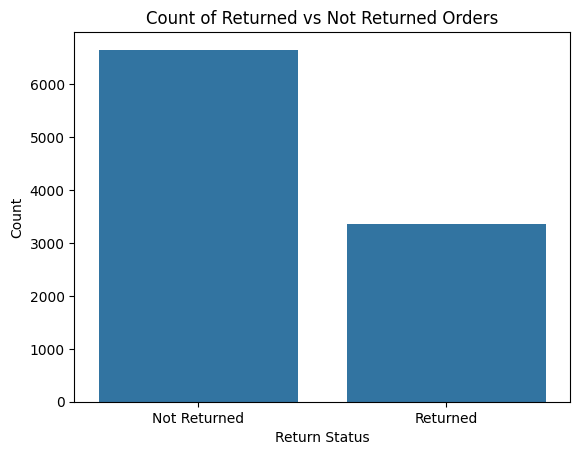

In [15]:
sns.countplot(x='Return_Status', data=df)
plt.title('Count of Returned vs Not Returned Orders')
plt.xlabel('Return Status')
plt.ylabel('Count')
plt.show()

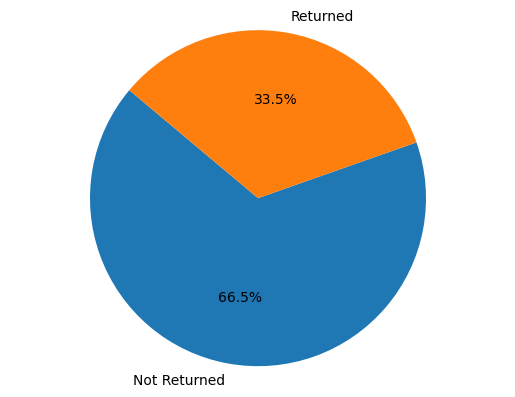

In [16]:
plt.pie(df['Return_Status'].value_counts(), labels=df['Return_Status'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\1381848250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_missing.index, y=non_missing.values, palette="viridis")


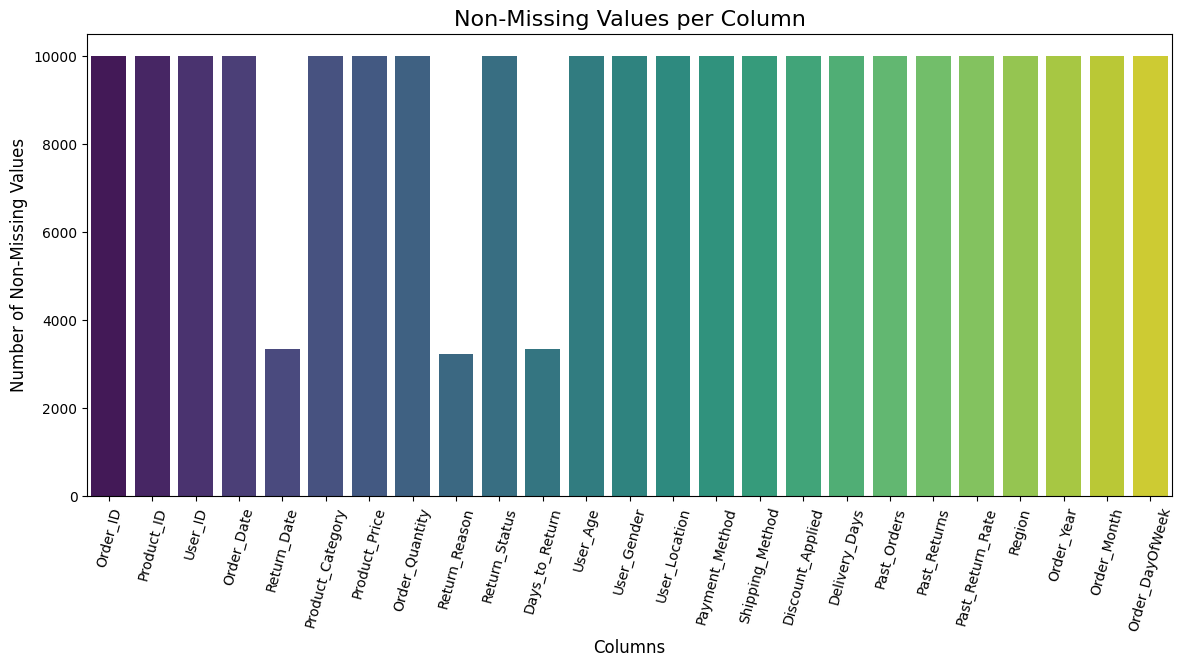

In [17]:
non_missing = df.notnull().sum()

plt.figure(figsize=(14,6))
sns.barplot(x=non_missing.index, y=non_missing.values, palette="viridis")

plt.title("Non-Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Non-Missing Values", fontsize=12)
plt.xticks(rotation=75)
plt.show()

C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\1598181114.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Payment_Method", y="Return_Status_num", data=return_rate, palette="Set2")


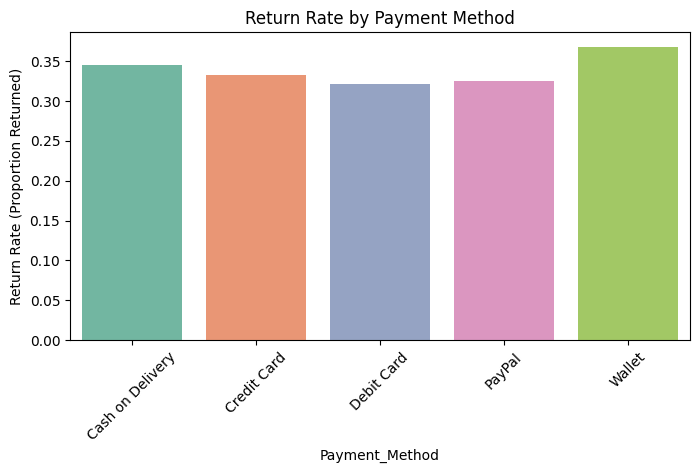

C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\1598181114.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product_Category", y="Return_Status_num", data=return_rate, palette="Set2")


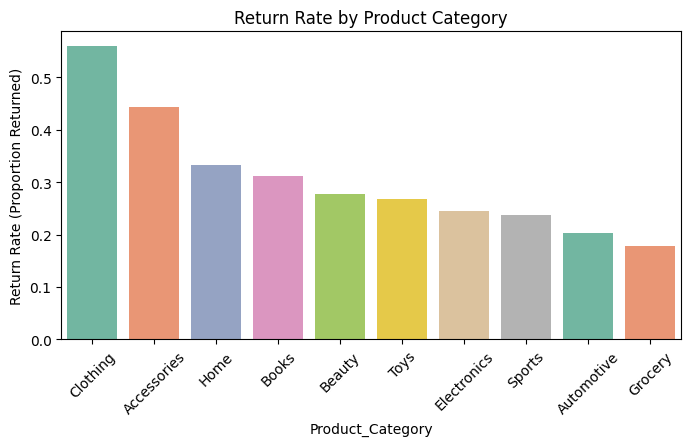

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Return_Status is binary 0/1
df["Return_Status_num"] = df["Return_Status"].map({"Not Returned":0,"Returned":1})

# --- Return rate per Payment Method ---
if "Payment_Method" in df.columns:
    return_rate = df.groupby("Payment_Method")["Return_Status_num"].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x="Payment_Method", y="Return_Status_num", data=return_rate, palette="Set2")
    plt.ylabel("Return Rate (Proportion Returned)")
    plt.title("Return Rate by Payment Method")
    plt.xticks(rotation=45)
    plt.show()

# --- Return rate per Product Category ---
if "Product_Category" in df.columns:
    return_rate = df.groupby("Product_Category")["Return_Status_num"].mean().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x="Product_Category", y="Return_Status_num", data=return_rate, palette="Set2")
    plt.ylabel("Return Rate (Proportion Returned)")
    plt.title("Return Rate by Product Category")
    plt.xticks(rotation=45)
    plt.show()


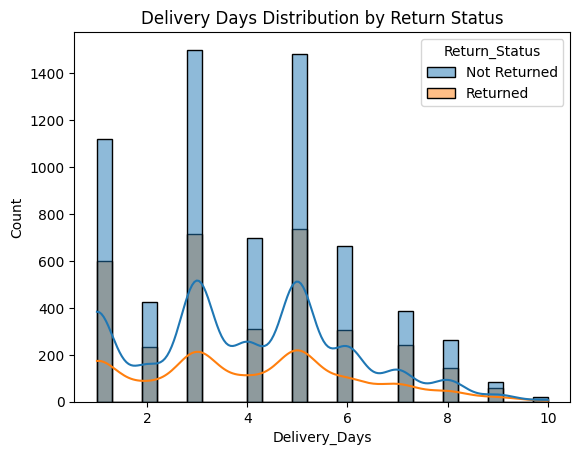

In [19]:
sns.histplot(data=df, x="Delivery_Days", hue="Return_Status", bins=30, kde=True)
plt.title("Delivery Days Distribution by Return Status")
plt.show()


In [20]:
df["Delivery_Days_Bin"] = pd.cut(df["Delivery_Days"], bins=[0,2,6,10,20])
return_rates = df.groupby("Delivery_Days_Bin")["Return_Status_num"].mean()
print(return_rates)


Delivery_Days_Bin
(0, 2]      0.349306
(2, 6]      0.321846
(6, 10]     0.376656
(10, 20]         NaN
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\1749854924.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rates = df.groupby("Delivery_Days_Bin")["Return_Status_num"].mean()


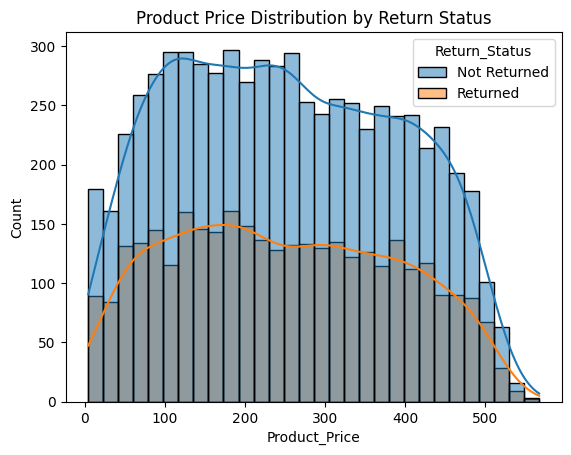

In [21]:
sns.histplot(data=df, x="Product_Price", hue="Return_Status", bins=30, kde=True)
plt.title("Product Price Distribution by Return Status")
plt.show()


In [22]:
df["Product_Price_Bin"] = pd.qcut(df["Product_Price"], q=10)  # 10 quantile bins
return_rates = df.groupby("Product_Price_Bin")["Return_Status_num"].mean()
print(return_rates)


Product_Price_Bin
(4.329, 66.964]       0.351
(66.964, 113.132]     0.320
(113.132, 155.157]    0.339
(155.157, 198.786]    0.348
(198.786, 243.04]     0.330
(243.04, 289.462]     0.322
(289.462, 338.973]    0.348
(338.973, 390.844]    0.346
(390.844, 445.382]    0.321
(445.382, 567.2]      0.325
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\3815277522.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return_rates = df.groupby("Product_Price_Bin")["Return_Status_num"].mean()


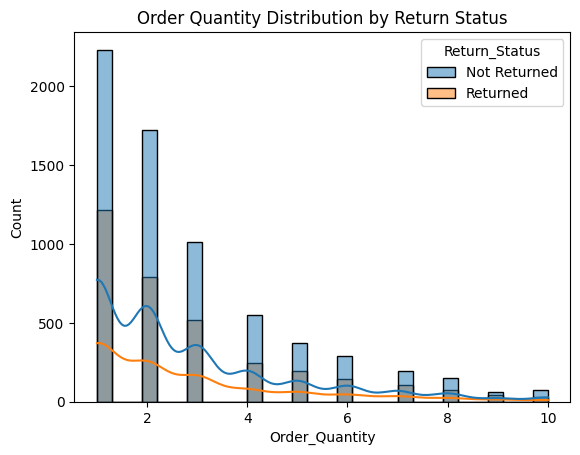

In [23]:
sns.histplot(data=df, x="Order_Quantity", hue="Return_Status", bins=30, kde=True)
plt.title("Order Quantity Distribution by Return Status")
plt.show()


In [24]:
# Bin Order Quantity into quantiles (10 groups)
df["Order_Qty_Bin"] = pd.qcut(df["Order_Quantity"], q=10, duplicates="drop")

# Calculate return rate in each bin
order_qty_return_rates = df.groupby("Order_Qty_Bin")["Return_Status_num"].mean()

print(order_qty_return_rates)


Order_Qty_Bin
(0.999, 2.0]    0.336803
(2.0, 3.0]      0.338139
(3.0, 4.0]      0.306045
(4.0, 6.0]      0.335685
(6.0, 10.0]     0.344262
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\2044040058.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_qty_return_rates = df.groupby("Order_Qty_Bin")["Return_Status_num"].mean()


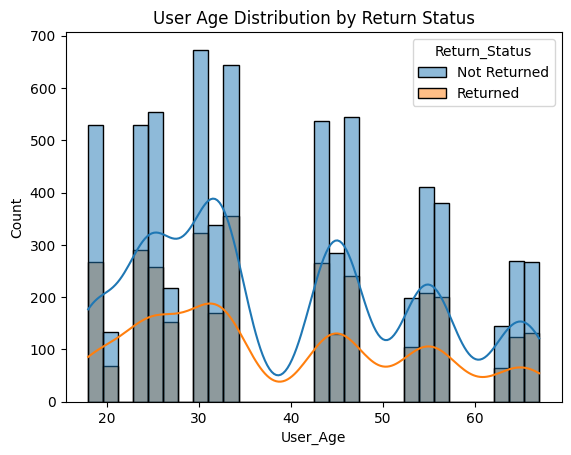

In [25]:
sns.histplot(data=df, x="User_Age", hue="Return_Status", bins=30, kde=True)
plt.title("User Age Distribution by Return Status")
plt.show()


In [26]:
# Bin Order Quantity into quantiles (10 groups)
df["User_Age_Bin"] = pd.qcut(df["User_Age"], q=10, duplicates="drop")

# Calculate return rate in each bin
User_Age_return_rates = df.groupby("User_Age_Bin")["Return_Status_num"].mean()

print(User_Age_return_rates)


User_Age_Bin
(17.999, 23.0]    0.344147
(23.0, 25.0]      0.322929
(25.0, 30.0]      0.355096
(30.0, 32.0]      0.326284
(32.0, 34.0]      0.355355
(34.0, 44.0]      0.331258
(44.0, 46.0]      0.310429
(46.0, 54.0]      0.313253
(54.0, 63.0]      0.348263
(63.0, 67.0]      0.322825
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\547300064.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  User_Age_return_rates = df.groupby("User_Age_Bin")["Return_Status_num"].mean()


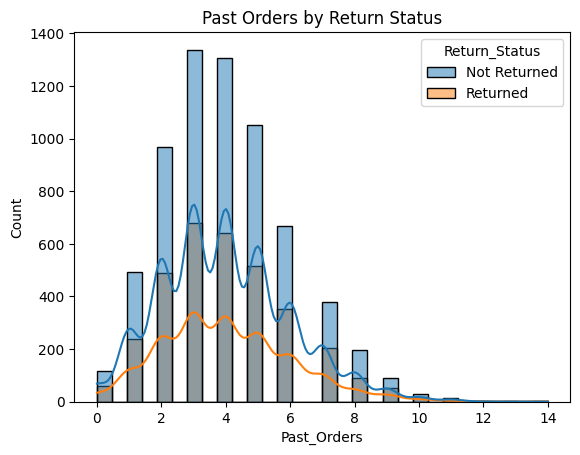

In [27]:
sns.histplot(data=df, x="Past_Orders", hue="Return_Status", bins=30, kde=True)
plt.title("Past Orders by Return Status")
plt.show()


In [28]:
# Bin Order Quantity into quantiles (10 groups)
df["Past_Orders_Bin"] = pd.qcut(df["Past_Orders"], q=10, duplicates="drop")

# Calculate return rate in each bin
Past_Orders_return_rates = df.groupby("Past_Orders_Bin")["Return_Status_num"].mean()

print(Past_Orders_return_rates)


Past_Orders_Bin
(-0.001, 2.0]    0.333474
(2.0, 3.0]       0.335980
(3.0, 4.0]       0.329394
(4.0, 5.0]       0.329082
(5.0, 6.0]       0.344794
(6.0, 7.0]       0.349914
(7.0, 14.0]      0.341270
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\3243656885.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Past_Orders_return_rates = df.groupby("Past_Orders_Bin")["Return_Status_num"].mean()


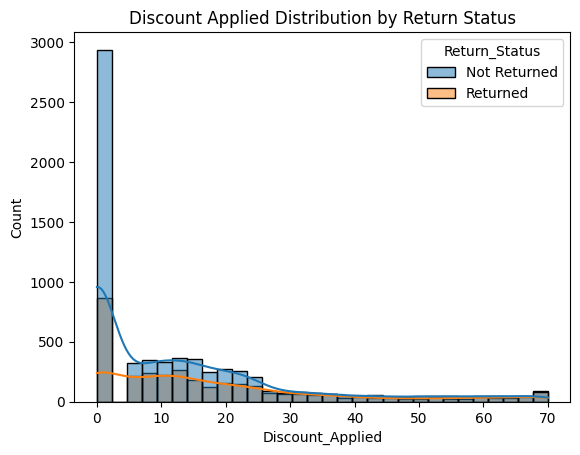

In [29]:
sns.histplot(data=df, x="Discount_Applied", hue="Return_Status", bins=30, kde=True)
plt.title("Discount Applied Distribution by Return Status")
plt.show()


In [30]:
# Bin Order Quantity into quantiles (10 groups)
df["Discount_Applied_Bin"] = pd.qcut(df["Discount_Applied"], q=10, duplicates="drop")

# Calculate return rate in each bin
Discount_Applied_return_rates = df.groupby("Discount_Applied_Bin")["Return_Status_num"].mean()

print(Discount_Applied_return_rates)


Discount_Applied_Bin
(-0.001, 5.796]     0.235750
(5.796, 9.7]        0.402597
(9.7, 13.6]         0.408000
(13.6, 18.69]       0.346307
(18.69, 24.392]     0.370110
(24.392, 41.363]    0.446000
(41.363, 70.0]      0.434000
Name: Return_Status_num, dtype: float64


C:\Users\SATHVIK\AppData\Local\Temp\ipykernel_27548\2119560083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Discount_Applied_return_rates = df.groupby("Discount_Applied_Bin")["Return_Status_num"].mean()


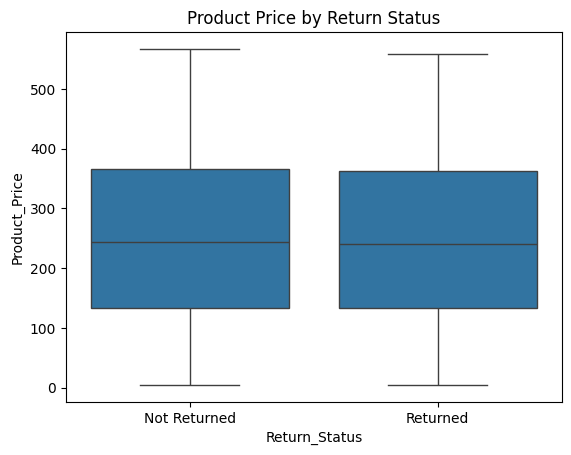

In [31]:
sns.boxplot(x="Return_Status", y="Product_Price", data=df)
plt.title("Product Price by Return Status")
plt.show()


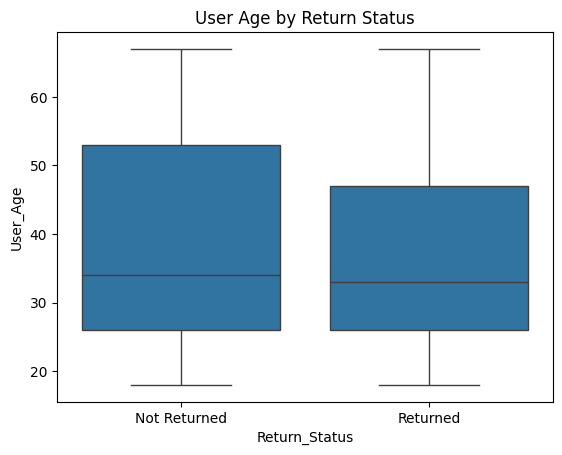

In [32]:
sns.boxplot(x="Return_Status", y="User_Age", data=df)
plt.title("User Age by Return Status")
plt.show()


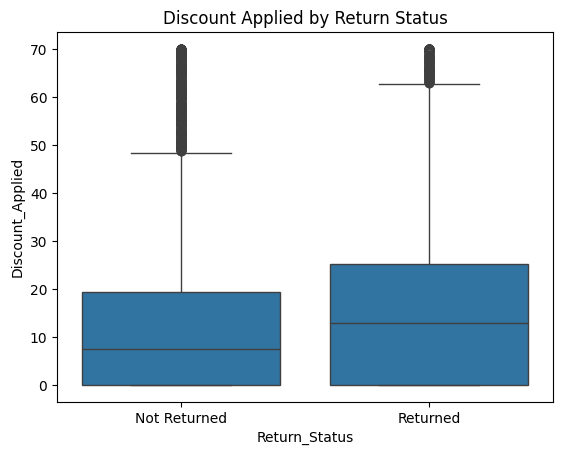

In [33]:
sns.boxplot(x="Return_Status", y="Discount_Applied", data=df)
plt.title("Discount Applied by Return Status")
plt.show()


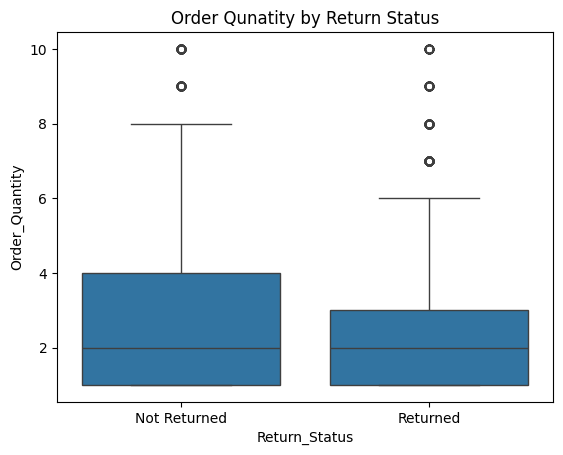

In [34]:
sns.boxplot(x="Return_Status", y="Order_Quantity", data=df)
plt.title("Order Qunatity by Return Status")
plt.show()


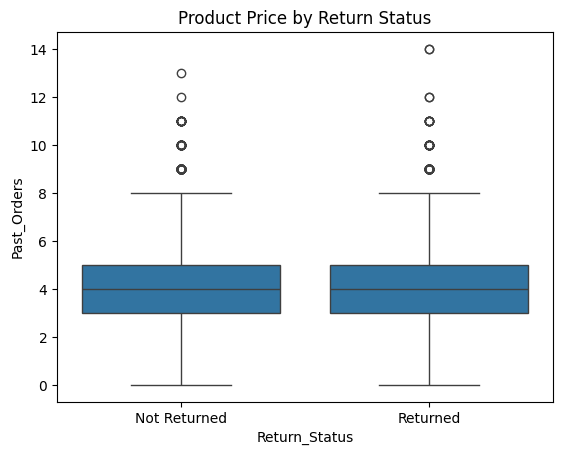

In [35]:
sns.boxplot(x="Return_Status", y="Past_Orders", data=df)
plt.title("Product Price by Return Status")
plt.show()


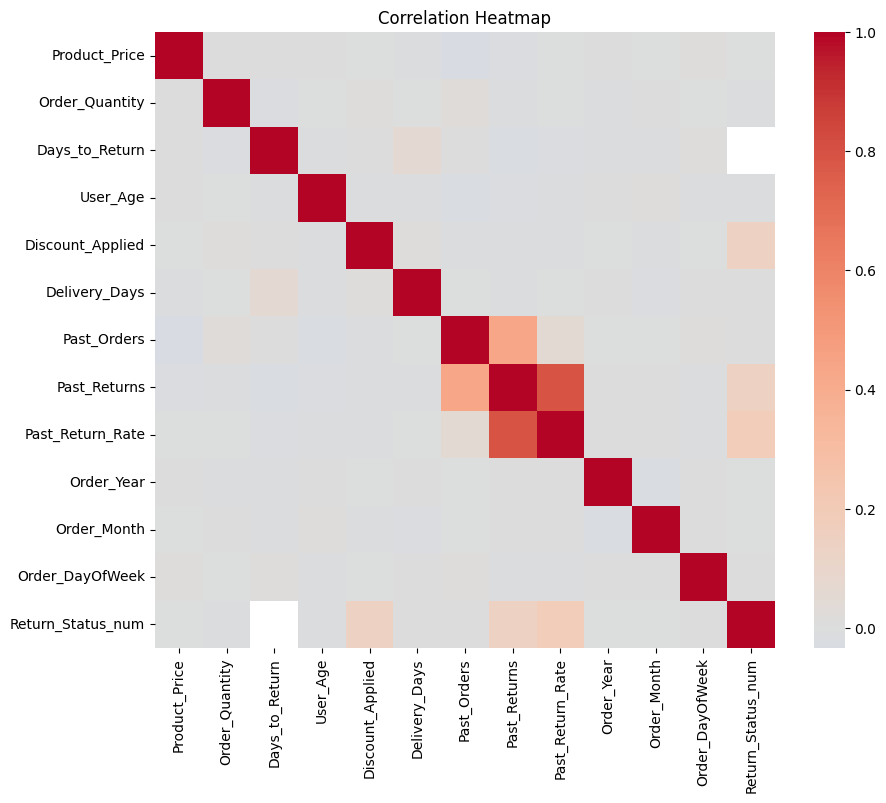

In [36]:
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()



# Feature Engineering And Model BUilding 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order_ID              10000 non-null  object        
 1   Product_ID            10000 non-null  object        
 2   User_ID               10000 non-null  object        
 3   Order_Date            10000 non-null  datetime64[ns]
 4   Return_Date           3350 non-null   datetime64[ns]
 5   Product_Category      10000 non-null  object        
 6   Product_Price         10000 non-null  float64       
 7   Order_Quantity        10000 non-null  int64         
 8   Return_Reason         3235 non-null   object        
 9   Return_Status         10000 non-null  object        
 10  Days_to_Return        3350 non-null   float64       
 11  User_Age              10000 non-null  int64         
 12  User_Gender           10000 non-null  object        
 13  User_Location    

In [45]:
from re import X
from tkinter import Y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42 # type: ignore
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression (with sigmoid by default)
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


NameError: name 'y' is not defined

In [40]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 1. Make a copy of original dataset 
df_copy = df.copy()

# 2. One-hot encode categorical variables 
df_encoded = pd.get_dummies(df_copy, drop_first=True)

# --- 3. Define features and target ---
X = df_encoded.drop(columns=["Return_Status_Returned"])  
y = df_encoded["Return_Status_Returned"]

# Ensure numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# 4.Added small Gaussian noise (can skip if dataset is clean) 
X_noisy = X + np.random.normal(0, 0.01, X.shape)

# 5. Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X_noisy, y, test_size=0.3, random_state=42, stratify=y
)

# 6.Apply SMOTE on training set to balance classes 
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 7. Train Random Forest 
model = RandomForestClassifier(
    n_estimators=50,      
    random_state=42,
    class_weight="balanced",
    n_jobs=-1             
)
model.fit(X_train_res, y_train_res)

# 8. Predict & evaluate 
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1993    2]
 [ 218  787]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1995
           1       1.00      0.78      0.88      1005

    accuracy                           0.93      3000
   macro avg       0.95      0.89      0.91      3000
weighted avg       0.93      0.93      0.92      3000

